In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from eyeInfo import EyeInfo

calib_points = [
    { "x": 200, "y": 200, 'order':1 },
    { "x": 1672, "y": 200, 'order':2 },
    { "x": 936, "y": 472, 'order':3 },
    { "x": 200, "y": 744, 'order':4 },
    { "x": 1672, "y": 744, 'order':5 }
]

eye = EyeInfo(calib_points=calib_points)
eye.init_eye()


right = './csv/output/outright.csv'
left = './csv/output/outleft.csv'
train = './csv/data/mask2_fixed_train_data.csv'
predict = './csv/data/mask2_predict_train_data.csv'

calib_df = eye.calib_df

# right_x = (right_df['screen_x']).tolist()
# right_y = (right_df['screen_y']).tolist()
# left_x = (left_df['screen_x']).tolist()
# left_y = (left_df['screen_y']).tolist()
# mean_x = ((right_df['screen_x'] + left_df['screen_x']) / 2).tolist()
# mean_y = ((right_df['screen_y'] + left_df['screen_y']) / 2).tolist()


File ./data.csv not found.


In [2]:
right_df = pd.read_csv(right)
left_df = pd.read_csv(left)
train_df = pd.read_csv(train)
predict_df = pd.read_csv(predict)
# print(train_df)
mean_df = pd.DataFrame()
mean_df['screen_x'] = (right_df['screen_x'] + left_df['screen_x']) / 2
mean_df['screen_y'] = (right_df['screen_y'] + left_df['screen_y']) / 2


# coloque o tamanho do subset para que o dataframe seja dividido igualmente em 5 pedaços
subset_size = 50
subset_mean_df1 = train_df.iloc[0:subset_size]
print(subset_mean_df1.shape)
subset_mean_df2 = train_df.iloc[subset_size:subset_size*2]
print(subset_mean_df2.shape)
subset_mean_df3 = train_df.iloc[subset_size*2:subset_size*3]
print(subset_mean_df3.shape)
subset_mean_df4 = train_df.iloc[subset_size*3:subset_size*4]
print(subset_mean_df4.shape)
subset_mean_df5 = train_df.iloc[subset_size*4:subset_size*5]
print(subset_mean_df5.shape)

predict_subset_mean_df1 = predict_df.iloc[0:subset_size]
print(subset_mean_df1.shape)
predict_subset_mean_df2 = predict_df.iloc[subset_size:subset_size*2]
print(subset_mean_df2.shape)
predict_subset_mean_df3 = predict_df.iloc[subset_size*2:subset_size*3]
print(subset_mean_df3.shape)
predict_subset_mean_df4 = predict_df.iloc[subset_size*3:subset_size*4]
print(subset_mean_df4.shape)
predict_subset_mean_df5 = predict_df.iloc[subset_size*4:subset_size*5]
print(subset_mean_df5.shape)

(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)


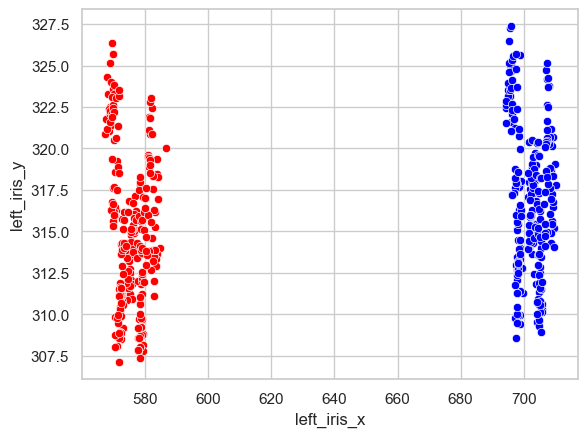

In [3]:
low_lim = 0
upper_lim_x = eye.k_screen_width    
upper_lim_y = eye.k_screen_height

palette = {
    'calib_df': 'black',
    'first': 'blue',
    'second': 'red',
    'third': 'green',
    'fourth': 'yellow',
    'fifth':'lightgreen'
}

legend_dict = {
    palette['first']: 'left iris',
    palette['second']: 'right iris',
    palette['third']: 'Cluster 3',
    # palette['fourth']: 'Cluster 4',
    # palette['fifth']: 'Cluster 5',
}

sns.set(style="whitegrid")
# sns.scatterplot(data=calib_df, x='screen_x', y='screen_y',size='order', color=palette['calib_df'])

sns.scatterplot(data=subset_mean_df1, x='left_iris_x', y='left_iris_y', color=palette['first'])
sns.scatterplot(data=subset_mean_df2, x='left_iris_x', y='left_iris_y', color=palette['first'])
sns.scatterplot(data=subset_mean_df3, x='left_iris_x', y='left_iris_y', color=palette['first'])
sns.scatterplot(data=subset_mean_df4, x='left_iris_x', y='left_iris_y', color=palette['first'])
sns.scatterplot(data=subset_mean_df5, x='left_iris_x', y='left_iris_y', color=palette['first'])

sns.scatterplot(data=subset_mean_df1, x='right_iris_x', y='right_iris_y', color=palette['second'])
sns.scatterplot(data=subset_mean_df2, x='right_iris_x', y='right_iris_y', color=palette['second'])
sns.scatterplot(data=subset_mean_df3, x='right_iris_x', y='right_iris_y', color=palette['second'])
sns.scatterplot(data=subset_mean_df4, x='right_iris_x', y='right_iris_y', color=palette['second'])
sns.scatterplot(data=subset_mean_df5, x='right_iris_x', y='right_iris_y', color=palette['second'])


# for color, label in legend_dict.items():
#     plt.scatter([], [], c=color, label=label)
# plt.legend()

# plt.xlim(low_lim, upper_lim_x)
# plt.ylim(low_lim, upper_lim_y)

plt.show()

<Axes: xlabel='right_iris_x', ylabel='right_iris_y'>

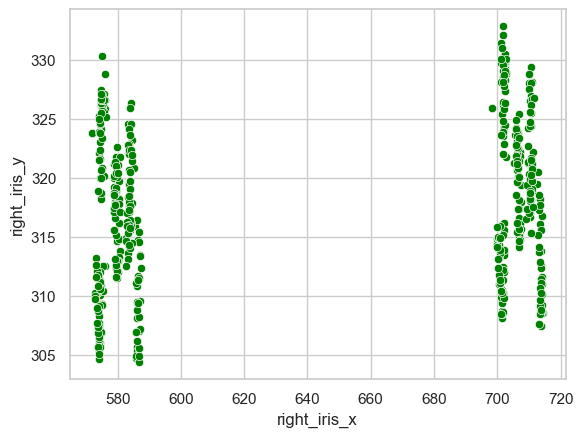

In [4]:
sns.scatterplot(data=predict_subset_mean_df1, x='right_iris_x', y='right_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df2, x='right_iris_x', y='right_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df3, x='right_iris_x', y='right_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df4, x='right_iris_x', y='right_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df5, x='right_iris_x', y='right_iris_y', color=palette['third'])

sns.scatterplot(data=predict_subset_mean_df1, x='left_iris_x', y='left_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df2, x='left_iris_x', y='left_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df3, x='left_iris_x', y='left_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df4, x='left_iris_x', y='left_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df5, x='left_iris_x', y='left_iris_y', color=palette['third'])